# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import markers

# Read the Data



In [43]:
df_tesla = pd.read_csv('Google Trends Data Viz/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Google Trends Data Viz/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Google Trends Data Viz/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('Google Trends Data Viz/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Let's explore some basic things with regards to our Tesla Google searches dataframe**

In [44]:
df_tesla.shape
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [45]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [46]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [47]:
df_tesla.groupby("MONTH")
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Unemployment Data

**Let's explore some basic things with regards to our unemployment data dataframe**

In [48]:
df_unemployment.shape

(181, 3)

In [49]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [50]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [51]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [52]:
print('Largest value for "Unemployemnt Benefits"'
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits"in Web Search: 100


### Bitcoin

**Let's explore some basic things with regards to our Bitcoin Google searches dataframe**

In [53]:
df_btc_search.shape

(73, 2)

In [54]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [55]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [56]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [57]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


In [58]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [59]:
df_btc_price.shape

(2204, 3)

In [60]:
df_btc_price.tail()

,DATE,CLOSE,VOLUME
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10
2203,2020-09-28,10912.536133,2.122653e+10


In [61]:
print(f"Highest btc price: {df_btc_price['CLOSE'].max()}")
print(f"Lowest btc price: {df_btc_price['CLOSE'].min()}")

Highest btc price: 19497.400391
Lowest btc price: 178.102997


In [62]:
df_btc_price.head()
print(f"Highest volume for BTC is: {df_btc_price['VOLUME'].max()}")
print(f"Lowest volume for BTC is: {df_btc_price['VOLUME'].min()}")

Highest volume for BTC is: 74156772074.0
Lowest volume for BTC is: 5914570.0


# Data Cleaning

### Check for Missing Values

Are there **any missing values in any of the dataframes**? If so, which row/rows have missing values? How many missing values are there?

In [63]:
print(df_tesla.isna().values.any())

print(df_btc_search.isna().values.any())

print(df_unemployment.isna().values.any())

print(df_btc_price.isna().values.any()) #NaN values here

False
False
False
True


In [64]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [65]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [66]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


Let's **remove any missing values** we found. 

In [67]:
df_btc_price[df_btc_price["CLOSE"].isna()]
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

Let's **convert the data type of the entries in the DataFrame MONTH or DATE columns to Datetime objects**.

In [68]:
print(df_tesla.columns)
print(type(df_tesla["MONTH"][0]))
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
print(type(df_tesla["MONTH"][0]))

print(df_btc_search.columns)
print(type(df_btc_search["MONTH"][0]))
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])

print(df_unemployment.columns)
print(type(df_unemployment["MONTH"][0]))
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])

print(df_btc_price.columns)
print(type(df_btc_price["DATE"][0]))
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
<class 'str'>
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
<class 'str'>
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
<class 'str'>


### Converting from Daily to Monthly Data



In [69]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()
# df_btc_monthly = df_btc_price.resample("M", on="DATE").mean()

print(df_btc_monthly.head())
df_btc_monthly.shape

                 DATE       CLOSE      VOLUME
DATE                                         
2014-09-30 2014-09-30  386.944000  34707300.0
2014-10-31 2014-10-31  338.321014  12545400.0
2014-11-30 2014-11-30  378.046997   9194440.0
2014-12-31 2014-12-31  320.192993  13942900.0
2015-01-31 2015-01-31  217.464005  23348200.0


(73, 3)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [70]:
# Create locators for ticks on the time axis
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [71]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

Let's plot the **Tesla stock price against the Tesla search volume** using a line chart and two different axes.

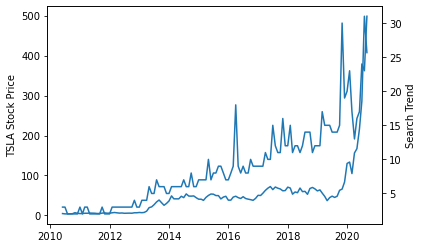

In [72]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"])
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"])

Let's add colours to **style the chart.** 

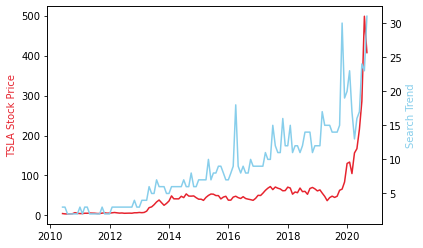

In [73]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E")
ax2.set_ylabel("Search Trend", color="skyblue")

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="#E6232E")
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="skyblue")

Let's **work a bit further on the looks** of our chart.

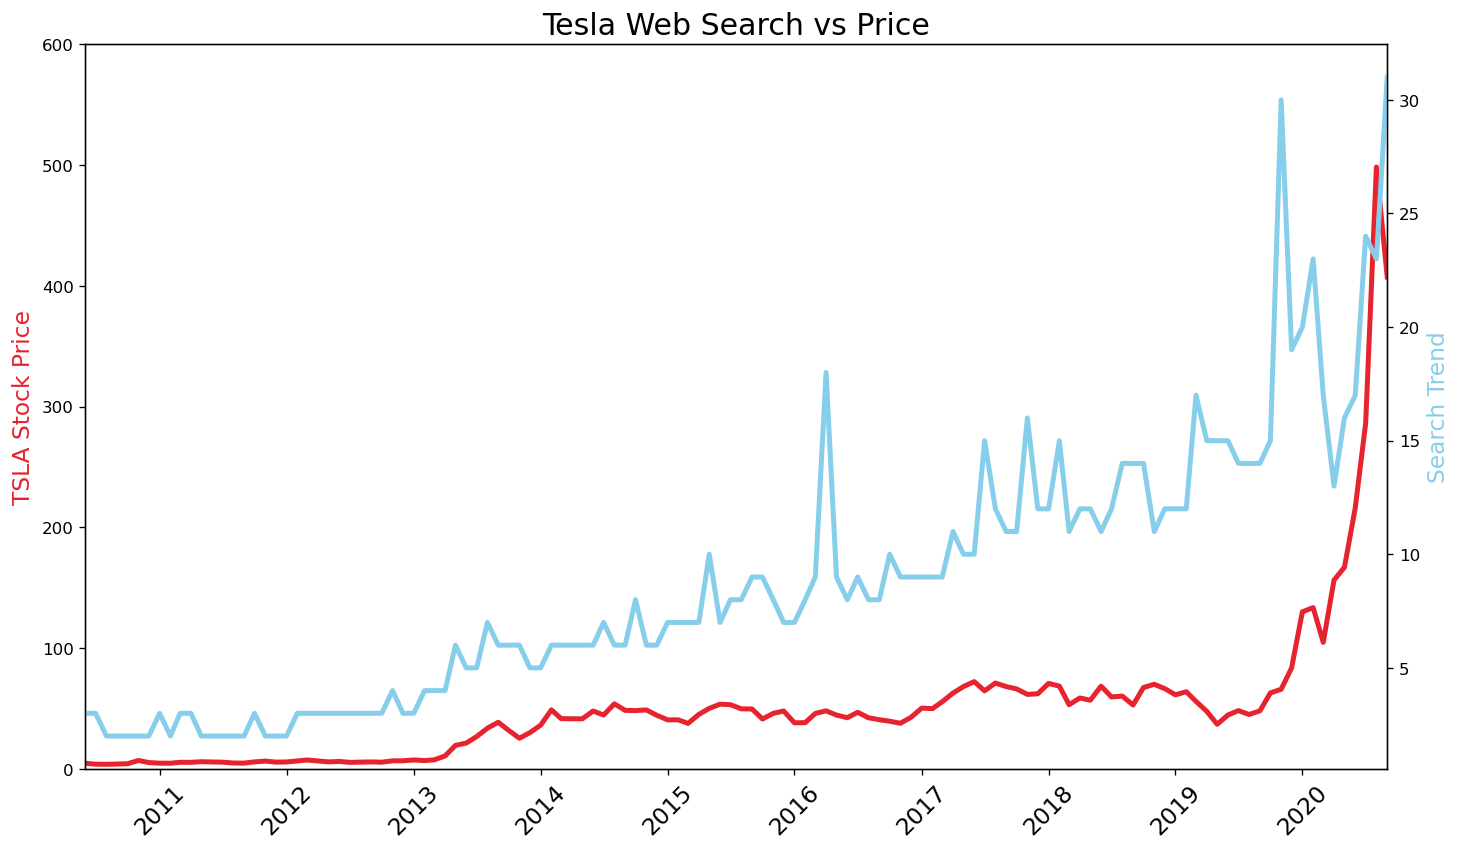

In [74]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

#Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

#Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla["MONTH"].min(), df_tesla["MONTH"].max()])

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="#E6232E", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="skyblue", linewidth=3)

plt.show()

Now let's **add tick formatting for dates on the x-axis**. 

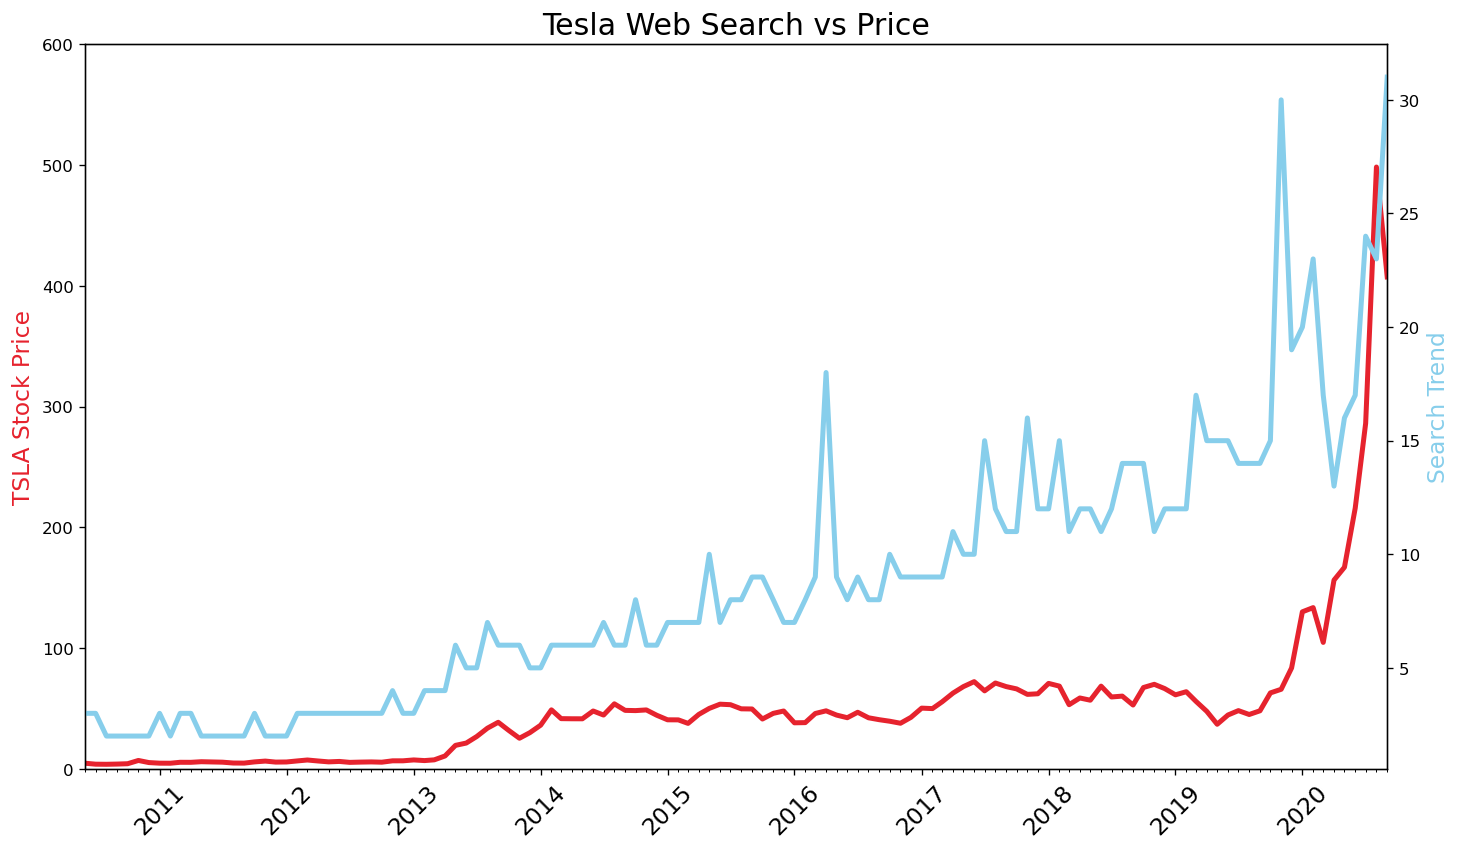

In [75]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

Now let's create the **same chart for the Bitcoin Prices vs. Search volumes**.

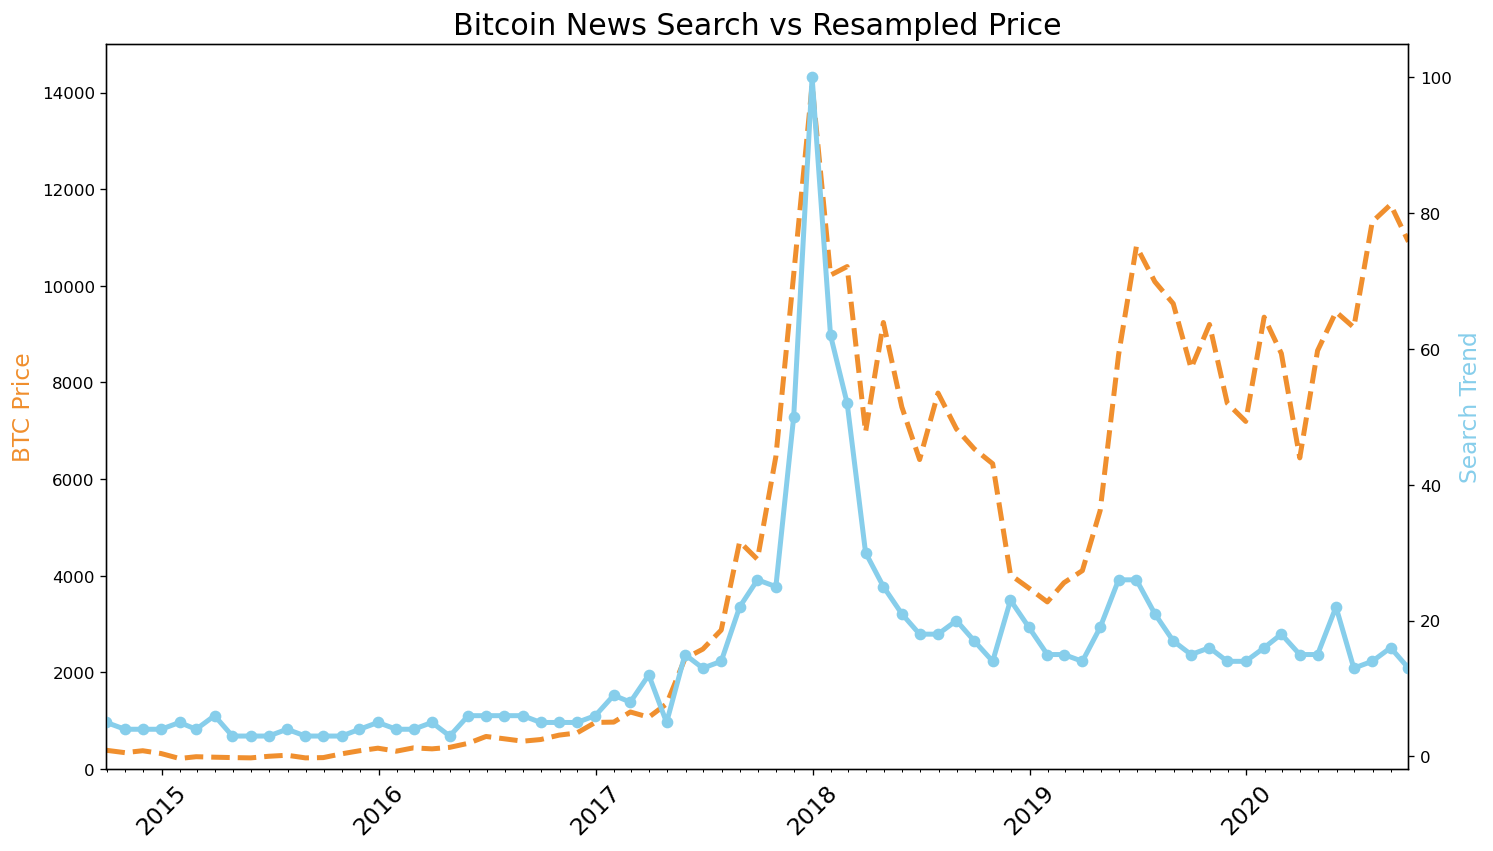

In [76]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2E', linewidth=3, linestyle="--")
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker="o")

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Let's **plot the search for "unemployment benefits" against the unemployment rate**.

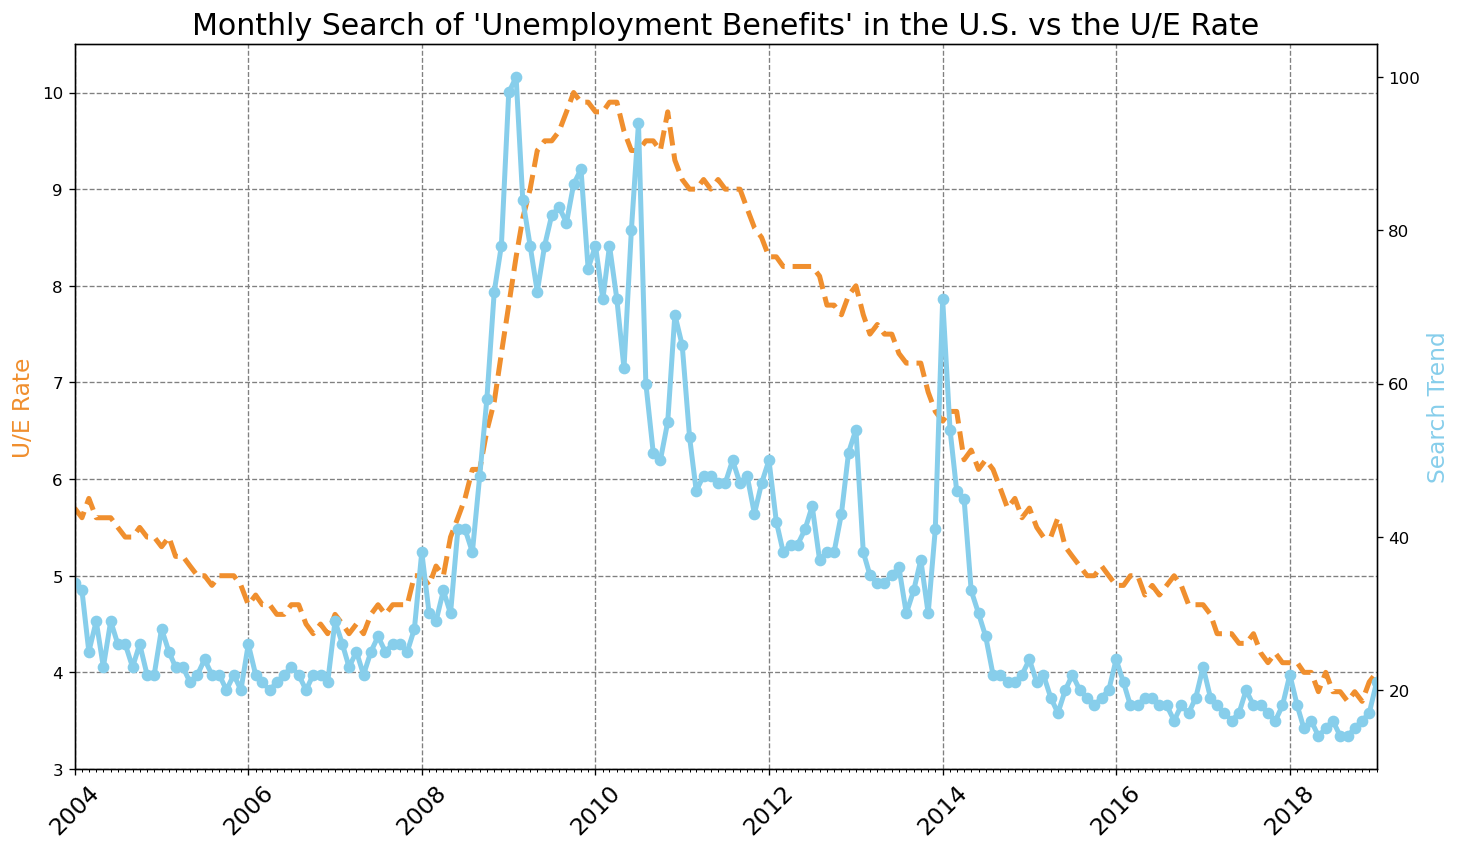

In [77]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('U/E Rate', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#F08F2E', linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, marker="o")

plt.show()

Let's **smooth out our chart by providing 6-month rolling average for the web searches**.


In [78]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

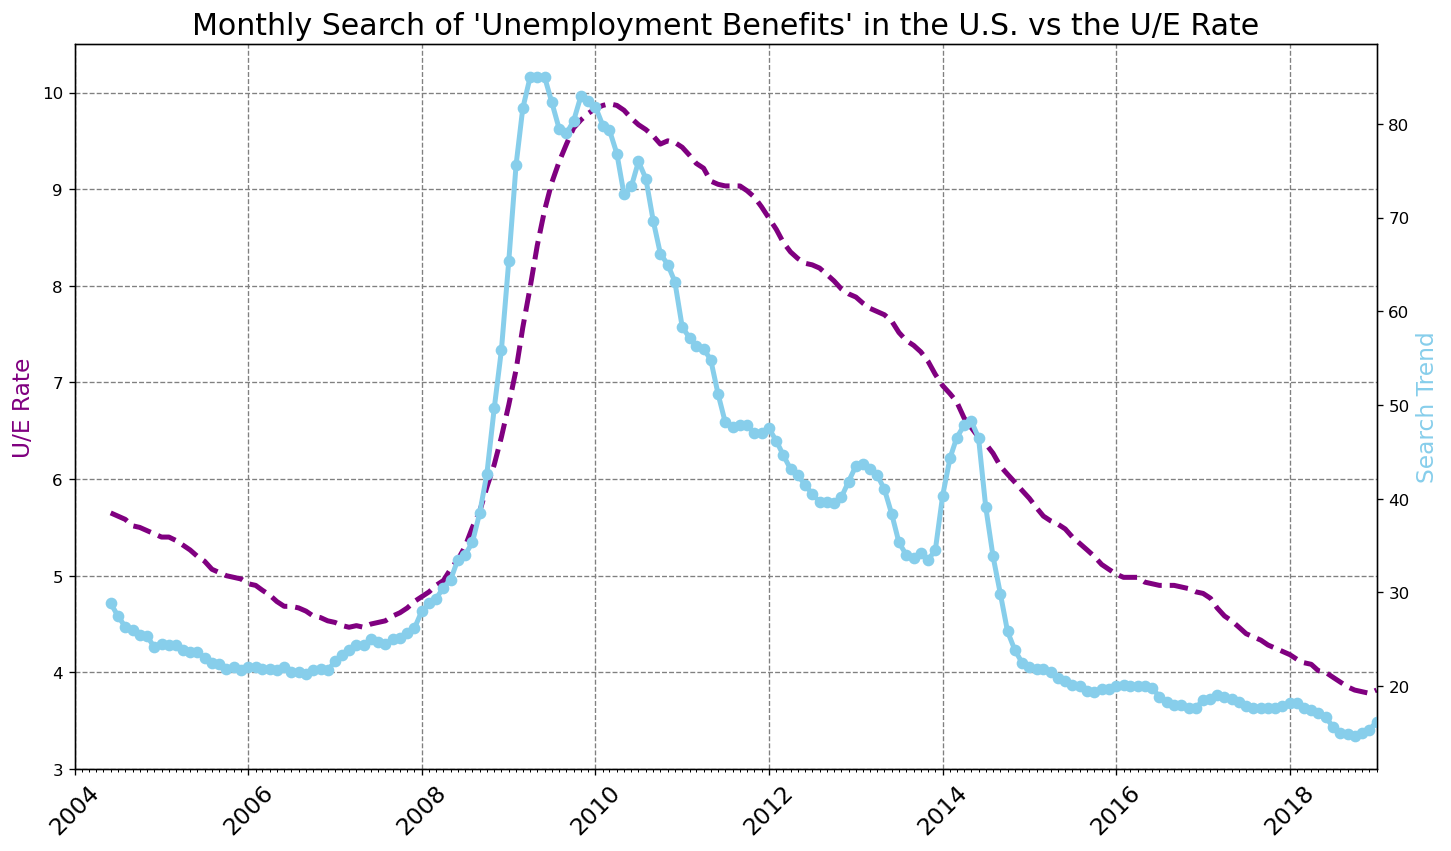

In [79]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_ylabel('U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='purple', linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, marker="o")

plt.show()

### Including 2020 in Unemployment Charts

In [80]:
df_ue_2020 = pd.read_csv("Google Trends Data Viz/UE Benefits Search vs UE Rate 2004-20.csv")

df_ue_2020["MONTH"] = pd.to_datetime(df_ue_2020["MONTH"])
print(type(df_ue_2020.MONTH[0]))
df_ue_2020.columns

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

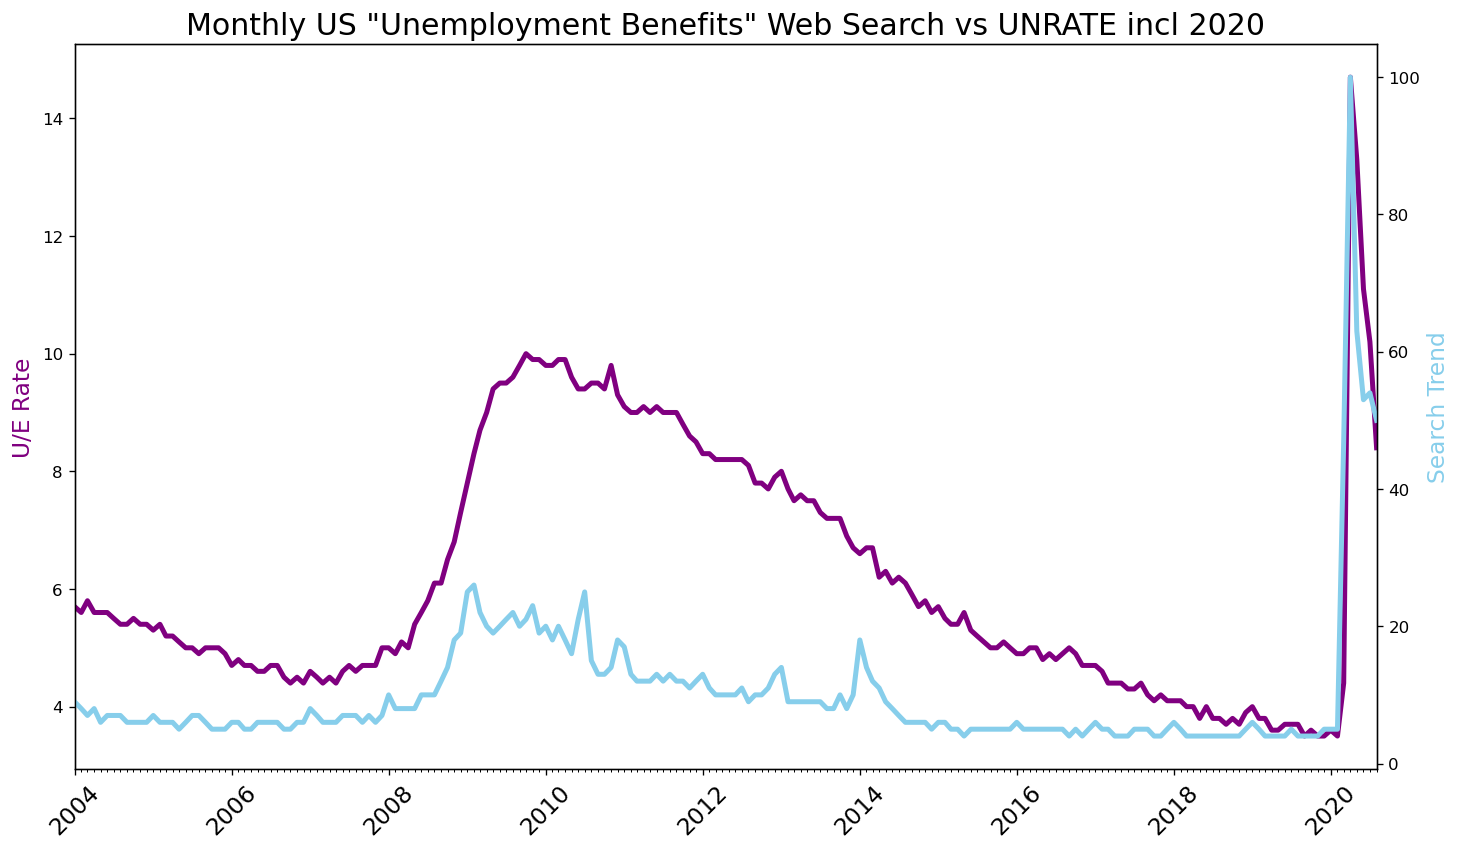

In [81]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color='purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()